# Housing Component of Logan Neighborhood Research

This notebook is the housing section of our group project on Logan Neighborhood in Philadelphia, PA. This revised note book addresses three different requirements for Week 7's group assignment: 

1) Narrows the scope of our research question
2) Cleans up the code used in the housing portion of the midterm assignment 
3) Attempts to make an isochrome map

**First:** Our revised research question is: *In terms of social infrastructure and the built environment, what community needs emerge as a priority for North Philadelphia’s Logan Neighborhood that could be addressed through the redevelopment of the Logan Triangle?*

**Second:** Yoh provided helpful feedback on the technical aspects of our midterm assignment, which included a recommendation to streamline our code by reading in just one dataset for all of Philadelphia and then subsetting the six tracts that make up the Logan Neighborhood, which are 42101028000, 42101028100, 42101028200, 42101028300, 42101028400, 42101028500. Yoh also recommended that we create an outline around Logan to include on all our maps of the larger Philadelphia area. We wanted to standardize this outline across the cloropleth maps. 

**Third:** I am going to try to better clean some of the data in the Affordable Housing Developments dataset and then create a walkshed around housing projects in Logan to see how accessible the Logan Triangle is from housing investments. 

These data explore the current housing conditions in and around the Logan Triangle area of Philadelphia. Data are pulled from Census data via Social Explorer and the Philadelphia Open Data Portal. The two datasets include housing indicators from the ACS 5-Year Estimates (2017-2021) and a dataset of affordable housing projects financed by the Department of Housing and Community Development from 1994-2019. 

#### Data Investigation ####
In conducting my initial visualizations of housing trends, I merge Census data and bring together housing variables and tract data for mapping.  

- **First** , I read in the first dataset of housing indicators for all the census tracts that make up all of Philadelhpia.

- **Step 2** , 

- **Step 3**, I read in a data from the Philadelphia census tracts with geometries on FIPS codes (downloaded from the Philadelphia Open Data Portal), bringing the geometries together with downloaded housing indicator output.

- **Step 4**, I join these two datasets together on FIPS codes to be able to map data. 

- **Step 5**, I do exploration of the dataset to get a sense of it. I begin to make charts that compare the Logan Neighborhood to the larger Philadelphia area to get a sense of comparisons. 

- **Step 6**, TBD

#### Data Visualizations ####
The priorities for this post-midterm update is to consolidate some of the coding steps, create visuals with a consistent color scheme, clear distinctions between Logan and Philadelphia to help with comparison (through the creation of a boundary), and layer to begin to add depth to our analysis. Some of the elements that this included are:

- **Static Maps** of rent and home value with the Logan tracts outlined against Philadelphia
- **Static Maps** with affordable housing projects from 25 years 
- **Interactive Maps** with the rent data and project data overlaid and coded by type of project
- **Bar chart** with the type of projects for comparison

Our first step is to import the libraries that we need to use.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

Next, we read in the Census ACS 2017-2021 data that includes housing indicators, but we want to ensure that the geographic identifiers are read in as string variables.  

In [3]:
dfpa = pd.read_csv(
    'data/R13285245_SL140.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)


I am going to drop varaibles that do not have any data. 

In [4]:
dfpa = dfpa.dropna(axis=1,how="all")

And keep columns that do!

In [5]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A10008_001',
                   'SE_A10008_002',
                   'SE_A10008_003',
                   'SE_A10008_004',
                   'SE_A10008_005',
                   'SE_A10008_006',
                   'SE_A10008_007',
                   'SE_A10008_008',
                   'SE_A10008_009',
                   'SE_A10003_001',
                   'SE_B10060_001',
                   'SE_B10060_002',
                   'SE_B10060_003',
                   'SE_A10036_001',
                   'SE_A18009_001',
                   'SE_A10032_001',
                   'SE_A10032_002',
                   'SE_A10032_003',
                   'SE_A10032_004',
                   'SE_A10032_005',
                   'SE_A10032_006',
                   'SE_A10032_007',
                   'SE_A10032_008',
                   'SE_A10032_009',
                   'SE_A10032_010',
                   'SE_A10032_011',
                   'SE_A10032_012',
                   'SE_A10055_001',
                   'SE_A10055_002',
                   'SE_A10055_003',
                   'SE_A10055_004',
                   'SE_A10055_005',
                   'SE_A10055_006',
                   'SE_A10055_007',
                   'SE_A10055_008',
                   'SE_A10055_009',
                   'SE_A10055_010',
                   'SE_A10055_011',]

I am making a new data frame that will include only the columns with data, and I will add in the names of these variables.

In [6]:
dfphilly = dfpa[columns_to_keep]

In [7]:
dfphilly.columns = ['FIPS',
                   'Households',
                   'Family Households',
                   'Married-Couple Family',
                   'Other Family',
                   'Male Householder, No Wife Present',
                   'Female Householder, No Husband Present',
                   'Nonfamily Households',
                   'Male Householder',
                   'Female Householder',
                   'Average Household Size of Occupied Housing Units',
                   'Owner Occupied Housing Units',
                   'White Alone, Not Hispanic or Latino Homeowners of Owner Occupied Housing Units',
                   'Non-White Homeowners of Owner Occupied Housing Units',
                   'Median House Value for All Owner-Occupied Housing Units',
                   'Median Gross Rent in Renter-occupied housing units paying cash rent',
                   'Housing Units',
                   '1 Unit',
                   '1 Unit, Detached',
                   '1 Unit, Attached',
                   '2 Units',
                   '3 or 4 Units',
                   '5 to 9 Units',
                   '10 to 19 Units',
                   '20 to 49 Units',
                   '50 or More Units',
                   'Mobile Home',
                   'Boat, Rv, Van, Etc.',
                   'Occupied Housing Units',
                   'Occupied Housing Units: Built 2020 or Later',
                   'Occupied Housing Units: Built 2010 to 2019',
                   'Occupied Housing Units: Built 2000 to 2009',
                   'Occupied Housing Units: Built 1990 to 1999',
                   'Occupied Housing Units: Built 1980 to 1989',
                   'Occupied Housing Units: Built 1970 to 1979',
                   'Occupied Housing Units: Built 1960 to 1969',
                   'Occupied Housing Units: Built 1950 to 1959',
                   'Occupied Housing Units: Built 1940 to 1949',
                   'Occupied Housing Units: Built 1939 or Earlier',]

Now, I am going to add these names to the corresponding columns and ensure that it works. 

In [8]:
columns = list(dfphilly)
columns

['FIPS',
 'Households',
 'Family Households',
 'Married-Couple Family',
 'Other Family',
 'Male Householder, No Wife Present',
 'Female Householder, No Husband Present',
 'Nonfamily Households',
 'Male Householder',
 'Female Householder',
 'Average Household Size of Occupied Housing Units',
 'Owner Occupied Housing Units',
 'White Alone, Not Hispanic or Latino Homeowners of Owner Occupied Housing Units',
 'Non-White Homeowners of Owner Occupied Housing Units',
 'Median House Value for All Owner-Occupied Housing Units',
 'Median Gross Rent in Renter-occupied housing units paying cash rent',
 'Housing Units',
 '1 Unit',
 '1 Unit, Detached',
 '1 Unit, Attached',
 '2 Units',
 '3 or 4 Units',
 '5 to 9 Units',
 '10 to 19 Units',
 '20 to 49 Units',
 '50 or More Units',
 'Mobile Home',
 'Boat, Rv, Van, Etc.',
 'Occupied Housing Units',
 'Occupied Housing Units: Built 2020 or Later',
 'Occupied Housing Units: Built 2010 to 2019',
 'Occupied Housing Units: Built 2000 to 2009',
 'Occupied Housing

To be able to map, I need to add in geographic data. I am importing a census tract file that includes geometries for all the tracts in Philly. 

In [10]:
tracts=gpd.read_file('data/Census_Tracts_2010.geojson')
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


To keep the data more manageable, I am only going to keep the variables for the geometry and the identifier, which will become the FIPS code.

In [12]:
tracts = tracts[['TRACTCE10','geometry']]
tracts.head()

,TRACTCE10,geometry
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


To make the full FIPS code variable, I take 42, because that is the state code for Pennsylvania and 101, the county code for Philadelphia and add those to the tract identifier.

In [13]:
tracts['FIPS'] ='42' + '101' + tracts['TRACTCE10']


In [14]:
tracts.head()

,TRACTCE10,geometry,FIPS
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",42101009400
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",42101009500
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",42101009600
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",42101013800
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",42101013900


Because the creation of the FIPS code worked in the step above, now my two datasets have a FIPS code variable. I can merge the two into a new dataset that has housing indicators and geometries to be able to map. 

In [15]:
pa_housing= tracts.merge(dfphilly,on='FIPS')

In [18]:
pa_housing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 41 columns):
 #   Column                                                                          Non-Null Count  Dtype   
---  ------                                                                          --------------  -----   
 0   TRACTCE10                                                                       363 non-null    object  
 1   geometry                                                                        363 non-null    geometry
 2   FIPS                                                                            363 non-null    object  
 3   Households                                                                      363 non-null    int64   
 4   Family Households                                                               363 non-null    int64   
 5   Married-Couple Family                                                           363 non-null    int64   
 6   Ot

Now that the datasets have been merged to add geographic data, we are going to subset the graphics in Logan and create a boundary for clearer comparisons. 

In [19]:
logan_FIPS = ["42101028000", "42101028100", "42101028200", "42101028300", "42101028400", "42101028500"]

logan_tracts = tracts[tracts['FIPS'].isin(logan_FIPS)]

logan_boundary = logan_tracts.dissolve()

In [20]:
logan_boundary.describe()

,geometry,TRACTCE10,FIPS
count,1,1,1
unique,1,1,1
top,"POLYGON ((-75.1357905168085 40.0229258164797, ...",028300,42101028300
freq,1,1,1


Now that the boundary has been created, I want to map a specific variable for all of Philadelphia and then layer on the outline of Logan. Because I know that the Logan Neighborhood has experienced a long history of disinvestment and the clearing of nearly 1,000 homes in the period from the 1990s-2010s, I want to see how home values compare within the neighborhood and against Philly. In the US, homes are a key source of wealth, and an indicator of thetype/extent of investment in a community. I am mapping **"Median House Value for All Owner-Occupied Housing Units"** by Census Tract in Philadelphia with the outline of Logan's six tracts included.

I am also going to standardize the bins for my map using code recommended by Yoh. 
**classification_kwds={'bins':[0.25, 0.5,0.75,1]}**

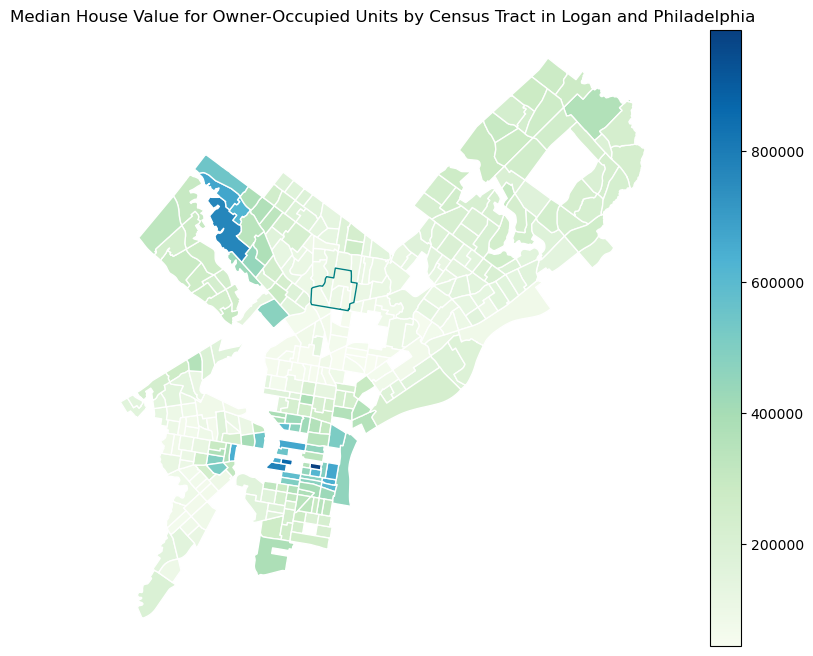

In [27]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_housing.plot(column = 'Median House Value for All Owner-Occupied Housing Units',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 1,ax=ax)
ax.axis('off')
plt.title('Median House Value for Owner-Occupied Units by Census Tract in Logan and Philadelphia')

plt.savefig("Median House Values Across Philadelphia Census Tracts.pdf", transparent=True)